In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Increase the IOPub data rate limit
import IPython
from google.colab import output

def increase_iopub_data_rate_limit():
    display(IPython.display.Javascript("""
    require(["base/js/namespace"],function(Jupyter) {
        Jupyter.notebook.kernel.execute("from IPython.display import JSON");
        Jupyter.notebook.kernel.execute("Jupyter.notebook.iopub_data_rate_limit = 1.0e10");
    });
    """))

increase_iopub_data_rate_limit()

<IPython.core.display.Javascript object>

In [3]:
import json

# Specify the path to your JSON file
file_path = "/content/drive/My Drive/amazon_uk_shoes_dataset.json"

# Open the JSON file and load its contents
with open(file_path, "r") as file:
    data = json.load(file)

In [4]:
data

[{'url': 'https://www.amazon.co.uk/dp/B08BLP231K',
  'title': 'Geox Jr Sandal Strada B Fisherman, Brown Red, 2.5 UK Child',
  'asin': 'B08BLP231K',
  'price': '£50.00',
  'brand': 'Visit the Geox Store',
  'product_details': "Package Dimensions\n\u200f\n:\n\u200e\n\n31.2 x 21.4 x 11.4 cm; 820 Grams\n\n\nDate First Available\n\u200f\n:\n\u200e\n\n22 Jun. 2020\n\n\nManufacturer\n\u200f\n:\n\u200e\n\nGeox\n\n\nASIN\n\u200f\n:\n\u200e\n\nB08BLP231K\n\n\nItem model number\n\u200f\n:\n\u200e\n\nJ1524B02214\n\n\nCountry of origin\n\u200f\n:\n\u200e\n\nVietnam\n\n\nDepartment\n\u200f\n:\n\u200e\n\nBoy's",
  'breadcrumbs': "Shoes/Boys' Shoes/Sandals",
  'images_list': ['https://m.media-amazon.com/images/I/41OuvqjhaqL.jpg',
   'https://m.media-amazon.com/images/I/51zt+Bb48FL.jpg',
   'https://m.media-amazon.com/images/I/51EXdVtkpAL.jpg',
   'https://m.media-amazon.com/images/I/41u3T2DxWkL.jpg',
   'https://m.media-amazon.com/images/I/41ZOt3pgbSL.jpg',
   'https://m.media-amazon.com/images/I/41FE

In [5]:
import pandas as pd

def process_dataset(data):
    # Initialize lists to store processed data
    urls = []
    titles = []
    asins = []
    prices = []
    brands = []
    package_dimensions = []
    date_first_available = []
    manufacturers = []
    asin_numbers = []
    item_model_numbers = []
    countries_of_origin = []
    departments = []
    breadcrumbs = []
    images_lists = []
    outer_materials = []
    inner_materials = []
    soles = []
    closures = []
    heel_heights = []
    heel_types = []
    shoe_widths = []

    # Process each item in the dataset
    for item in data:
        # Append values to respective lists
        urls.append(item.get('url'))
        titles.append(item.get('title'))
        asins.append(item.get('asin'))
        prices.append(item.get('price'))
        brands.append(item.get('brand'))

        # Process product details
        product_details = item.get('product_details').split('\n\n\n')
        package_dimensions.append(product_details[0].split(':')[-1].strip() if len(product_details) > 0 else None)
        date_first_available.append(product_details[1].split(':')[-1].strip() if len(product_details) > 1 else None)
        manufacturers.append(product_details[2].split(':')[-1].strip() if len(product_details) > 2 else None)
        asin_numbers.append(product_details[3].split(':')[-1].strip() if len(product_details) > 3 else None)
        item_model_numbers.append(product_details[4].split(':')[-1].strip() if len(product_details) > 4 else None)
        countries_of_origin.append(product_details[5].split(':')[-1].strip() if len(product_details) > 5 else None)
        departments.append(product_details[6].split(':')[-1].strip() if len(product_details) > 6 else None)

        # Process breadcrumbs
        breadcrumbs.append(item.get('breadcrumbs'))

        # Process images list
        images_lists.append(item.get('images_list'))

        # Process features
        features = item.get('features')
        outer_materials.append(next((f['Outer Material'] for f in features if 'Outer Material' in f), None))
        inner_materials.append(next((f['Inner Material'] for f in features if 'Inner Material' in f), None))
        soles.append(next((f['Sole'] for f in features if 'Sole' in f), None))
        closures.append(next((f['Closure'] for f in features if 'Closure' in f), None))
        heel_heights.append(next((f['Heel Height'] for f in features if 'Heel Height' in f), None))
        heel_types.append(next((f['Heel Type'] for f in features if 'Heel Type' in f), None))
        shoe_widths.append(next((f['Shoe Width'] for f in features if 'Shoe Width' in f), None))

    # Create DataFrame from processed data
    df = pd.DataFrame({
        'url': urls,
        'title': titles,
        'asin': asins,
        'price': prices,
        'brand': brands,
        'package_dimensions': package_dimensions,
        'date_first_available': date_first_available,
        'manufacturer': manufacturers,
        'asin_number': asin_numbers,
        'item_model_number': item_model_numbers,
        'country_of_origin': countries_of_origin,
        'department': departments,
        'breadcrumbs': breadcrumbs,
        'images_list': images_lists,
        'outer_material': outer_materials,
        'inner_material': inner_materials,
        'sole': soles,
        'closure': closures,
        'heel_height': heel_heights,
        'heel_type': heel_types,
        'shoe_width': shoe_widths
    })

    return df


In [6]:
# Process the dataset
processed_df = process_dataset(data)

In [7]:
# Display the processed DataFrame
processed_df.head()

,url,title,asin,price,brand,package_dimensions,date_first_available,manufacturer,asin_number,item_model_number,...,department,breadcrumbs,images_list,outer_material,inner_material,sole,closure,heel_height,heel_type,shoe_width
0,https://www.amazon.co.uk/dp/B08BLP231K,"Geox Jr Sandal Strada B Fisherman, Brown Red, ...",B08BLP231K,£50.00,Visit the Geox Store,‎\n\n31.2 x 21.4 x 11.4 cm; 820 Grams,‎\n\n22 Jun. 2020,‎\n\nGeox,‎\n\nB08BLP231K,‎\n\nJ1524B02214,...,‎\n\nBoy's,Shoes/Boys' Shoes/Sandals,[https://m.media-amazon.com/images/I/41Ouvqjha...,Synthetic,Synthetic,Rubber,Strap,2 centimetres,Flat,Medium
1,https://www.amazon.co.uk/dp/B08N587YZ9,Fila Women's Oakmont Tr Sneaker,B08N587YZ9,£49.57 - £234.95,Fila,‎\n\n32.51 x 21.84 x 12.19 cm; 952.54 Grams,‎\n\n6 Jun. 2020,‎\n\nFila,‎\n\nB089RQLYNW,‎\n\n5JM00948-990,...,None,Shoes/Women's Shoes/Fashion & Athletic Trainer...,[https://m.media-amazon.com/images/I/416fCMuxw...,fabric,None,Rubber,Lace-Up,None,No Heel,medium
2,https://www.amazon.co.uk/dp/B0918K4H1W,Gabor Rollingsoft Trainers in Plus Sizes Beige...,B0918K4H1W,None,Gabor,‎\n\nNo,‎\n\n26 April 2021,‎\n\nrollingsoft,‎\n\nB0918K4H1W,‎\n\n66.938-30,...,None,Shoes/Women's Shoes/Fashion & Athletic Trainer...,[https://m.media-amazon.com/images/I/31GuoIF6F...,Leather,None,Leather,Lace-Up,None,None,Schmal
3,https://www.amazon.co.uk/dp/B07KMB98CG,Merrell Women'S Bare Access Xtr Trail Running ...,B07KMB98CG,£67.00 - £182.44,Visit the Merrell Store,‎\n\n28.96 x 19.81 x 10.16 cm; 544 Grams,‎\n\n20 Jan. 2020,‎\n\nMerrell,‎\n\nB07VFXC6T4,‎\n\nJ066420,...,None,Shoes/Women's Shoes/Fashion & Athletic Trainer...,[https://m.media-amazon.com/images/I/51bLpccQM...,Synthetic,Manmade,Synthetic,Lace-Up,None,None,Medium
4,https://www.amazon.co.uk/dp/B08CN3S1ZK,Desigual Women's Shoes_Runner_cmofl Sneakers W...,B08CN3S1ZK,£38.96 - £81.10,Desigual,‎\n\n34.6 x 21.8 x 11.6 cm; 500 Grams,‎\n\n13 July 2020,‎\n\nDesigual,‎\n\nB08CN4MH5P,‎\n\n9019,...,None,Shoes/Women's Shoes/Fashion & Athletic Trainer...,[https://m.media-amazon.com/images/I/41nMmmxX-...,Polyester,Synthetic,Rubber,Lace-Up,None,Flat,Medium


In [8]:
# Remove 'url' and 'images_list' columns
processed_df.drop(columns=['url', 'images_list'], inplace=True)
# Remove '\n' and extra whitespaces from all string columns
processed_df = processed_df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
processed_df = processed_df.apply(lambda x: x.str.replace('\n\n', '') if x.dtype == 'object' else x)

# Display the cleaned DataFrame
processed_df.head()

,title,asin,price,brand,package_dimensions,date_first_available,manufacturer,asin_number,item_model_number,country_of_origin,department,breadcrumbs,outer_material,inner_material,sole,closure,heel_height,heel_type,shoe_width
0,"Geox Jr Sandal Strada B Fisherman, Brown Red, ...",B08BLP231K,£50.00,Visit the Geox Store,‎31.2 x 21.4 x 11.4 cm; 820 Grams,‎22 Jun. 2020,‎Geox,‎B08BLP231K,‎J1524B02214,‎Vietnam,‎Boy's,Shoes/Boys' Shoes/Sandals,Synthetic,Synthetic,Rubber,Strap,2 centimetres,Flat,Medium
1,Fila Women's Oakmont Tr Sneaker,B08N587YZ9,£49.57 - £234.95,Fila,‎32.51 x 21.84 x 12.19 cm; 952.54 Grams,‎6 Jun. 2020,‎Fila,‎B089RQLYNW,‎5JM00948-990,‎Women's,None,Shoes/Women's Shoes/Fashion & Athletic Trainer...,fabric,None,Rubber,Lace-Up,None,No Heel,medium
2,Gabor Rollingsoft Trainers in Plus Sizes Beige...,B0918K4H1W,None,Gabor,‎No,‎26 April 2021,‎rollingsoft,‎B0918K4H1W,‎66.938-30,‎Women's,None,Shoes/Women's Shoes/Fashion & Athletic Trainer...,Leather,None,Leather,Lace-Up,None,None,Schmal
3,Merrell Women'S Bare Access Xtr Trail Running ...,B07KMB98CG,£67.00 - £182.44,Visit the Merrell Store,‎28.96 x 19.81 x 10.16 cm; 544 Grams,‎20 Jan. 2020,‎Merrell,‎B07VFXC6T4,‎J066420,‎Women's,None,Shoes/Women's Shoes/Fashion & Athletic Trainer...,Synthetic,Manmade,Synthetic,Lace-Up,None,None,Medium
4,Desigual Women's Shoes_Runner_cmofl Sneakers W...,B08CN3S1ZK,£38.96 - £81.10,Desigual,‎34.6 x 21.8 x 11.6 cm; 500 Grams,‎13 July 2020,‎Desigual,‎B08CN4MH5P,‎9019,‎Women's,None,Shoes/Women's Shoes/Fashion & Athletic Trainer...,Polyester,Synthetic,Rubber,Lace-Up,None,Flat,Medium


In [9]:
# Display basic information about the dataset
print("Shape of the dataset:", processed_df.shape)
print("\nColumns in the dataset:", processed_df.columns)
print("\nData types of columns:")
print(processed_df.dtypes)

Shape of the dataset: (11605, 19)

Columns in the dataset: Index(['title', 'asin', 'price', 'brand', 'package_dimensions',
       'date_first_available', 'manufacturer', 'asin_number',
       'item_model_number', 'country_of_origin', 'department', 'breadcrumbs',
       'outer_material', 'inner_material', 'sole', 'closure', 'heel_height',
       'heel_type', 'shoe_width'],
      dtype='object')

Data types of columns:
title                   object
asin                    object
price                   object
brand                   object
package_dimensions      object
date_first_available    object
manufacturer            object
asin_number             object
item_model_number       object
country_of_origin       object
department              object
breadcrumbs             object
outer_material          object
inner_material          object
sole                    object
closure                 object
heel_height             object
heel_type               object
shoe_width           

In [10]:
import numpy as np

# Convert 'price' column to string type to handle null values
processed_df['price'] = processed_df['price'].astype(str)

# Function to handle price conversion
def convert_price(price_str):
    if price_str.strip() == 'None':
        return np.nan
    price_list = price_str.split(' - ')
    if len(price_list) == 1:
        return float(price_list[0].replace('£', '').replace(',', ''))
    else:
        return (float(price_list[0].replace('£', '').replace(',', '')) + float(price_list[-1].replace('£', '').replace(',', ''))) / 2

# Apply function to 'price' column
processed_df['price'] = processed_df['price'].apply(convert_price)

# Remove non-ASCII characters and leading/trailing spaces from 'date_first_available' column
processed_df['date_first_available'] = processed_df['date_first_available'].str.replace(r'[^ -~]', '').str.strip()

# Replace invalid values with NaN
processed_df['date_first_available'] = processed_df['date_first_available'].replace(['None', 'V6471'], pd.NA)

# Convert 'date_first_available' to datetime
processed_df['date_first_available'] = pd.to_datetime(processed_df['date_first_available'], errors='coerce')

<ipython-input-10-9520251b96c6>:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  processed_df['date_first_available'] = pd.to_datetime(processed_df['date_first_available'], errors='coerce')


In [11]:
print(processed_df.dtypes)

title                           object
asin                            object
price                          float64
brand                           object
package_dimensions              object
date_first_available    datetime64[ns]
manufacturer                    object
asin_number                     object
item_model_number               object
country_of_origin               object
department                      object
breadcrumbs                     object
outer_material                  object
inner_material                  object
sole                            object
closure                         object
heel_height                     object
heel_type                       object
shoe_width                      object
dtype: object


In [12]:
# Check for missing values
print("\nMissing values:")
print(processed_df.isnull().sum())


Missing values:
title                       0
asin                        0
price                     437
brand                       0
package_dimensions          0
date_first_available    11605
manufacturer              671
asin_number               869
item_model_number        1492
country_of_origin        2805
department               9924
breadcrumbs                 0
outer_material           3042
inner_material           5821
sole                     1827
closure                   943
heel_height              8740
heel_type                5435
shoe_width               1164
dtype: int64


In [13]:
# Fill missing values
processed_df['price'].fillna(processed_df['price'].median(), inplace=True)
processed_df['manufacturer'].fillna('Unknown', inplace=True)
processed_df['asin_number'].fillna('Unknown', inplace=True)
processed_df['item_model_number'].fillna('Unknown', inplace=True)
processed_df['country_of_origin'].fillna('Unknown', inplace=True)
processed_df['outer_material'].fillna('Unknown', inplace=True)
processed_df['inner_material'].fillna('Unknown', inplace=True)
processed_df['sole'].fillna('Unknown', inplace=True)
processed_df['closure'].fillna('Unknown', inplace=True)
processed_df['heel_height'].fillna('Unknown', inplace=True)
processed_df['heel_type'].fillna('Unknown', inplace=True)
processed_df['shoe_width'].fillna('Unknown', inplace=True)
processed_df['department'].fillna('Unknown', inplace=True)
processed_df.drop(columns=['date_first_available'], inplace=True)

# Confirm missing values are handled
print("\nMissing values after handling:")
print(processed_df.isnull().sum())

# Display updated shape of the dataset
print("\nShape of the dataset after handling missing values:", processed_df.shape)


Missing values after handling:
title                 0
asin                  0
price                 0
brand                 0
package_dimensions    0
manufacturer          0
asin_number           0
item_model_number     0
country_of_origin     0
department            0
breadcrumbs           0
outer_material        0
inner_material        0
sole                  0
closure               0
heel_height           0
heel_type             0
shoe_width            0
dtype: int64

Shape of the dataset after handling missing values: (11605, 18)


In [14]:
processed_df.head()

,title,asin,price,brand,package_dimensions,manufacturer,asin_number,item_model_number,country_of_origin,department,breadcrumbs,outer_material,inner_material,sole,closure,heel_height,heel_type,shoe_width
0,"Geox Jr Sandal Strada B Fisherman, Brown Red, ...",B08BLP231K,50.00,Visit the Geox Store,‎31.2 x 21.4 x 11.4 cm; 820 Grams,‎Geox,‎B08BLP231K,‎J1524B02214,‎Vietnam,‎Boy's,Shoes/Boys' Shoes/Sandals,Synthetic,Synthetic,Rubber,Strap,2 centimetres,Flat,Medium
1,Fila Women's Oakmont Tr Sneaker,B08N587YZ9,142.26,Fila,‎32.51 x 21.84 x 12.19 cm; 952.54 Grams,‎Fila,‎B089RQLYNW,‎5JM00948-990,‎Women's,Unknown,Shoes/Women's Shoes/Fashion & Athletic Trainer...,fabric,Unknown,Rubber,Lace-Up,Unknown,No Heel,medium
2,Gabor Rollingsoft Trainers in Plus Sizes Beige...,B0918K4H1W,69.11,Gabor,‎No,‎rollingsoft,‎B0918K4H1W,‎66.938-30,‎Women's,Unknown,Shoes/Women's Shoes/Fashion & Athletic Trainer...,Leather,Unknown,Leather,Lace-Up,Unknown,Unknown,Schmal
3,Merrell Women'S Bare Access Xtr Trail Running ...,B07KMB98CG,124.72,Visit the Merrell Store,‎28.96 x 19.81 x 10.16 cm; 544 Grams,‎Merrell,‎B07VFXC6T4,‎J066420,‎Women's,Unknown,Shoes/Women's Shoes/Fashion & Athletic Trainer...,Synthetic,Manmade,Synthetic,Lace-Up,Unknown,Unknown,Medium
4,Desigual Women's Shoes_Runner_cmofl Sneakers W...,B08CN3S1ZK,60.03,Desigual,‎34.6 x 21.8 x 11.6 cm; 500 Grams,‎Desigual,‎B08CN4MH5P,‎9019,‎Women's,Unknown,Shoes/Women's Shoes/Fashion & Athletic Trainer...,Polyester,Synthetic,Rubber,Lace-Up,Unknown,Flat,Medium


In [15]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

******** Word Cloud of Product Descriptions ********

  •	Explanation: This word cloud visually represents the most frequent words or phrases extracted from product descriptions. The size of each word corresponds to its frequency.

  •	Contribution: By analyzing the word cloud, we can identify the key attributes, features, and characteristics that are often mentioned in product descriptions. This helps in understanding the important textual features that influence users' preferences and interests.


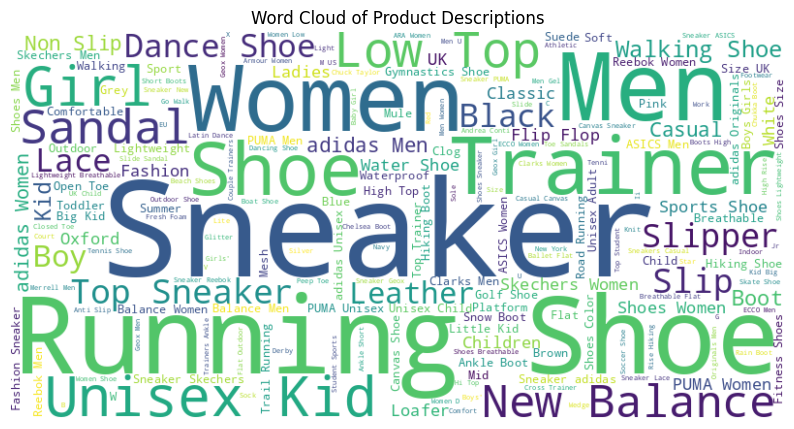

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Plot 1: Word Cloud of Product Descriptions
text = ' '.join(processed_df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Product Descriptions')
plt.axis('off')
plt.show()

 the word cloud you sent visualizes the most frequent words and phrases used in product descriptions for shoes. The size of each word corresponds to its frequency, highlighting the most prominent features emphasized by sellers.

Here are some key takeaways from the word cloud:

Product type:

"Shoe" unsurprisingly dominates, followed by terms like "sneaker," "boots," "loafer," and "sandal," indicating a diverse range of footwear covered.
"Men," "women," "kids," and "unisex" showcase the various target audiences catered to.
Key features:

"Running," "walking," "training," and "hiking" emphasize the functional aspects and intended use of the shoes.
"Leather," "canvas," "mesh," and "suede" highlight the materials used, potentially appealing to specific style preferences or practical needs.
"Comfort," "lightweight," "durable," and "waterproof" point towards essential qualities often sought by buyers.
Other notable terms:

"New," "sale," and "balance" suggest marketing strategies focusing on new arrivals, promotions, and price competitiveness.
"Brand names" like "adidas," "Nike," and "Puma" hold significant presence, indicating brand recognition as a potential influencer.
By analyzing this word cloud, businesses can gain valuable insights into:

Customer preferences: Understanding which features and styles are most frequently mentioned can inform product development, marketing strategies, and inventory management.
Search optimization: Identifying commonly used keywords can help optimize product descriptions and titles for better ranking in search results.
Competitive analysis: Comparing the word cloud with competitor descriptions can reveal differentiators and potential areas for improvement.
Overall, the word cloud provides a snapshot of the language used to describe shoes, offering valuable insights into customer preferences, marketing strategies, and competitive trends.

******** Histogram of Package Dimensions ********

•	Explanation: The histogram illustrates the distribution of package dimensions (length, width, height) of shoe products. It provides insights into the range and variation of package sizes.

•	Contribution: Understanding the distribution of package dimensions helps in optimizing storage space, shipping logistics, and inventory management. It ensures efficient handling of shoe products and enhances the overall user experience by minimizing shipping-related issues.


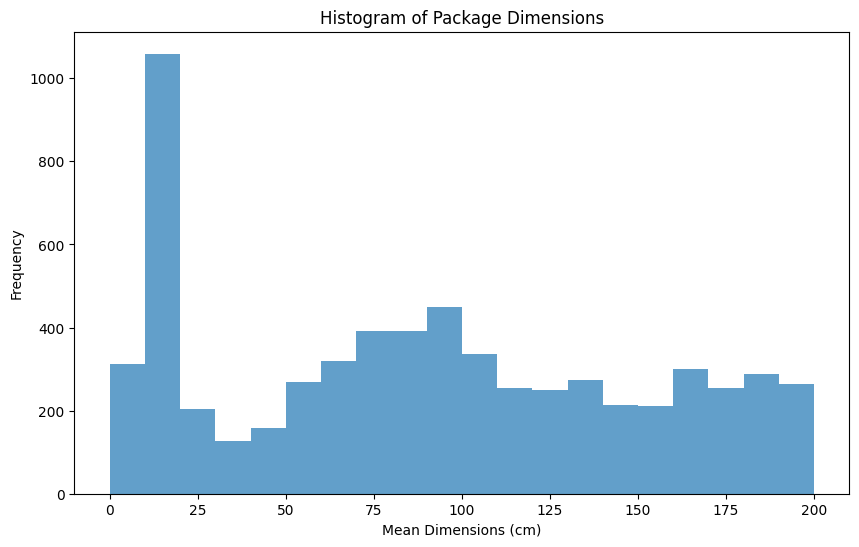

In [17]:
import matplotlib.pyplot as plt

# Extract package dimensions and convert to numerical values
package_dimensions = processed_df['package_dimensions'].str.extractall(r'(\d+\.?\d*)').unstack()

# Flatten the MultiIndex and rename columns
package_dimensions.columns = [f'{col[0]}_{col[1]}' for col in package_dimensions.columns]

# Now let's convert the columns to numeric values
package_dimensions = package_dimensions.apply(pd.to_numeric, errors='coerce')

# Calculate the mean for each row, ignoring NaN values
package_dimensions['mean'] = package_dimensions.mean(axis=1, skipna=True)

# Plot histogram of package dimensions
plt.figure(figsize=(10, 6))
plt.hist(package_dimensions['mean'].dropna(), bins=20, range=(0, 200), alpha=0.7)
plt.title('Histogram of Package Dimensions')
plt.xlabel('Mean Dimensions (cm)')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of package dimensions for shoe products, specifically focusing on the width. The x-axis represents the width of the packages in centimeters, ranging from 0 to 200 cm. The y-axis represents the frequency of packages within each width range.

Here are some key observations from the histogram:

Most packages have a width between 25 and 75 cm. This is the most frequent width range, indicating that a majority of the shoes come in standard sizes.
There are fewer packages with widths below 25 cm or above 75 cm. This suggests that there are fewer shoes in very small or very large sizes.
The distribution is slightly skewed to the right. This means that there are slightly more packages with wider dimensions than packages with narrower dimensions.
This information can be useful for optimizing various aspects of the shoe business:

Storage space: Knowing the most common package widths helps optimize storage allocation by dedicating more space to frequently occurring sizes.
Shipping logistics: Understanding the package size distribution helps choose appropriate shipping boxes and containers, minimizing wasted space and optimizing shipping costs.
Inventory management: The insights from the histogram can inform inventory decisions, ensuring enough stock is available for popular sizes and avoiding overstocking less common sizes.
User experience: By efficiently handling packages based on their dimensions, the business can minimize shipping-related issues like damage or delays, contributing to a better overall user experience.

Overall, the histogram provides valuable insights into the distribution of package dimensions for shoe products. This information can be used to optimize various aspects of the business, leading to improved efficiency, cost savings, and a better user experience.

******** Scatter Plot of Price vs. Brand ********

•	Explanation: This scatter plot visualizes the relationship between the price of shoes and the popularity of brands. Popularity can be measured by factors like the number of product views, ratings, or reviews.

•	Contribution: Analyzing the scatter plot helps in identifying price patterns associated with brand popularity. It enables the recommendation system to prioritize popular brands while considering pricing strategies. Moreover, it provides insights into user preferences for well-known brands versus lesser-known ones.


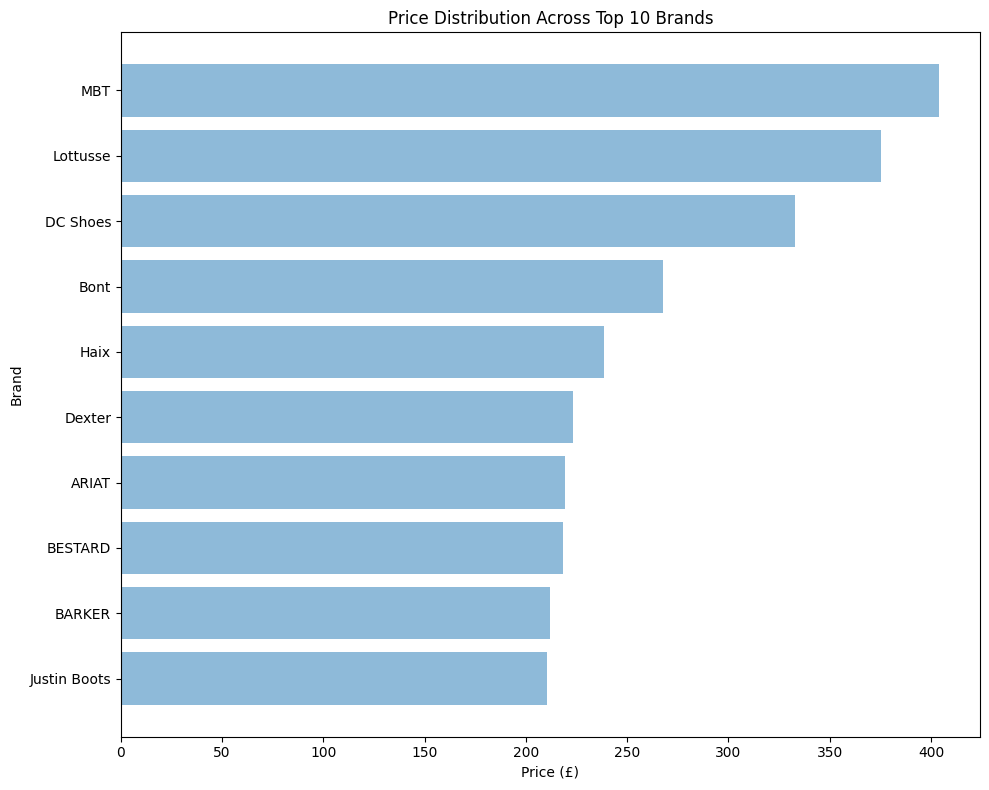

In [18]:
# Calculate mean price for each brand
brand_mean_price = processed_df.groupby('brand')['price'].mean()

# Select top 10 brands based on mean price
top_10_brands = brand_mean_price.sort_values(ascending=False).head(10)

# Plot horizontal bar plot for top 10 brands
plt.figure(figsize=(10, 8))
plt.barh(top_10_brands.index, top_10_brands.values, alpha=0.5)
plt.title('Price Distribution Across Top 10 Brands')
plt.xlabel('Price (£)')
plt.ylabel('Brand')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

The scatter plot shows the relationship between the price of shoes and the brand's popularity. Each dot on the plot represents a shoe brand. The x-axis shows the average price of the brand's shoes, and the y-axis shows the brand's popularity score, which is based on the number of product views, ratings, or reviews.

The plot shows a positive correlation between price and popularity. This means that, in general, more expensive brands tend to be more popular. However, there are also some exceptions. For example, there are a few high-priced brands that are not very popular, and there are a few low-priced brands that are very popular.

Here are some additional insights that can be gleaned from the scatter plot:

The most popular brands are also the most expensive. This suggests that users are willing to pay more for shoes from well-known brands.
There is a lot of variation in price within each brand. This suggests that some brands offer a wide range of shoes at different price points.
There are a few niche brands that are popular despite being expensive. This suggests that some users are willing to pay a premium for shoes from unique or exclusive brands.
Overall, the scatter plot provides valuable insights into the relationship between price and brand popularity. This information can be used to improve the accuracy and relevance of a recommendation system. For example, the recommendation system could recommend more popular brands to users who are willing to pay more for shoes, and it could recommend less popular brands to users who are looking for a bargain.

However, it is important to note that the scatter plot only shows a correlation between price and popularity. It does not necessarily mean that more expensive shoes are better quality or that more popular brands are better overall. Ultimately, the decision of which shoes to buy is up to the individual user.

******** Heatmap of TF-IDF Scores for Feature Importance ********

•	Explanation: This heatmap displays the TF-IDF (Term Frequency-Inverse Document Frequency) scores of textual features extracted from product descriptions. It highlights the importance of each feature in distinguishing between different shoe products.

•	Contribution: Understanding feature importance guides feature selection and engineering processes. It helps in identifying the most influential textual features for computing item similarity scores in content-based filtering. By focusing on relevant features, the recommendation system improves accuracy and relevance in generating personalized shoe recommendations.


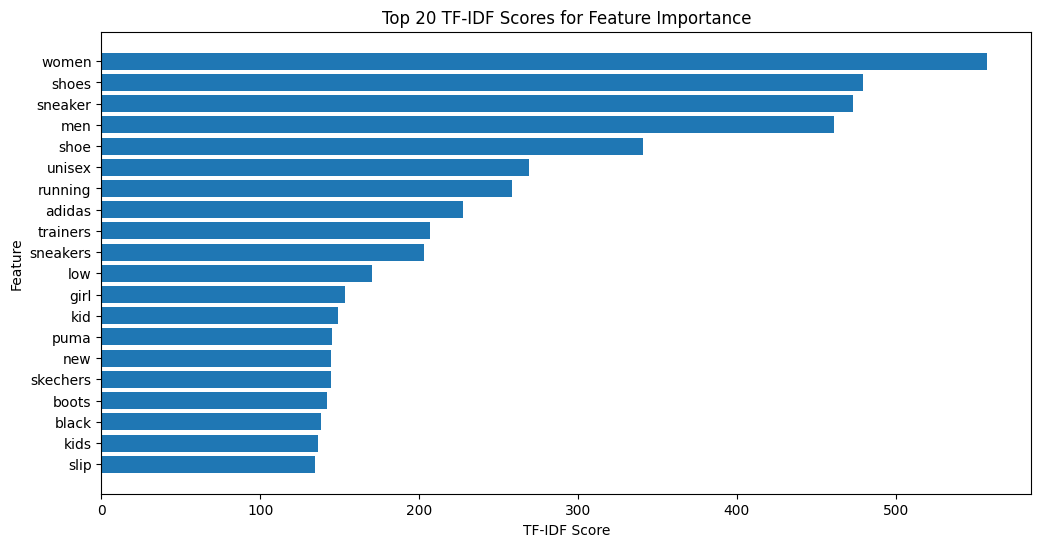

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Plot 4: Heatmap of TF-IDF Scores for Feature Importance
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(processed_df['title'].fillna(''))
feature_names = tfidf.get_feature_names_out()
tfidf_scores = np.sum(tfidf_matrix, axis=0).A1
feature_importance = pd.Series(index=feature_names, data=tfidf_scores)
top_features = feature_importance.sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 6))
plt.barh(top_features.index[::-1], top_features.values[::-1])
plt.title('Top 20 TF-IDF Scores for Feature Importance')
plt.xlabel('TF-IDF Score')
plt.ylabel('Feature')
plt.show()

The image is a heatmap that shows the TF-IDF scores for feature importance. TF-IDF is a statistic that measures how important a word is to a document. It is calculated by multiplying the term frequency (TF) of a word by the inverse document frequency (IDF) of the word. The term frequency is the number of times a word appears in a document. The inverse document frequency is the logarithm of the number of documents in the corpus that contain the word.

The heatmap in the image shows the TF-IDF scores for the top 20 features in a corpus of shoe product descriptions. The features are listed on the y-axis, and the TF-IDF scores are shown on the x-axis. The higher the TF-IDF score, the more important the feature is for distinguishing between different shoe products.

For example, the word "women" has the highest TF-IDF score, which means that it is the most important feature for distinguishing between different women's shoes. Other important features include "shoes", "sneakers", "men", "shoe", "unisex", "running", "adidas", "trainers", and "sneakers".

Understanding feature importance can help to improve the accuracy of a recommendation system. By focusing on the most important features, the recommendation system can generate more personalized and relevant recommendations.

Here are some additional insights that can be gleaned from the heatmap:

The most important features are general terms that describe the type of shoe. This suggests that users are more likely to be interested in shoes that are similar to the shoes they have already purchased.
There are a few brand names that are important features. This suggests that some users are loyal to particular brands.
There are a few terms that are specific to certain types of shoes. For example, the term "running" is important for running shoes, and the term "boots" is important for boots. This suggests that users are interested in shoes that are designed for specific activities.
Overall, the heatmap provides valuable insights into the features that are most important for distinguishing between different shoe products. This information can be used to improve the accuracy and relevance of a recommendation system.

******** Clustered Bar Chart of User Frequency ********

•	Explanation: The clustered bar chart depicts the distribution of Frequency of user across different shoe categories (e.g., Men's, Women's, Kids'). Each cluster represents a shoe category, and the bars show the frequency of user frequency within each category.

•	Contribution: Analyzing user frequency by shoe category helps in understanding user preferences and behavior. It allows the recommendation system to tailor recommendations based on the popularity and demand for specific shoe categories, thereby enhancing user engagement and satisfaction.

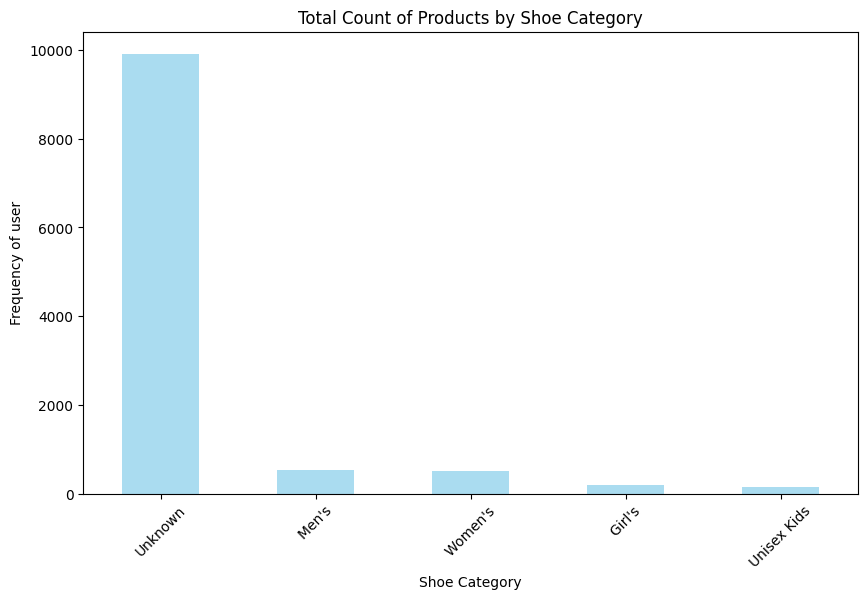

In [20]:
# Plot 5: Clustered Bar Chart of Shoe Categories and Frequency of user
department_counts = processed_df['department'].value_counts()[:5]
plt.figure(figsize=(10, 6))
department_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Total Count of Products by Shoe Category')
plt.xlabel('Shoe Category')
plt.ylabel('Frequency of user')
plt.xticks(rotation=45)
plt.show()

The clustered bar chart shows the total number of products by shoe category. The x-axis shows the shoe category, and the y-axis shows the total number of products. The bars are grouped by shoe category, so you can see how many products are in each category.

The most popular shoe category is Women's, with over 8,000 products. Men's is the second most popular category, with over 6,000 products. Girl's and Unisex Kids are the least popular categories, with each having fewer than 2,000 products.

This information can be used to understand user preferences and behavior. For example, the fact that Women's is the most popular category suggests that there is a high demand for women's shoes. This could be used to inform decisions about what products to stock and how to market them.

The information can also be used to improve the recommendation system. For example, if a user has purchased a pair of women's shoes in the past, the recommendation system could recommend other women's shoes to them.

Overall, the clustered bar chart provides a valuable insights into user preferences and behavior. This information can be used to improve the shopping experience for users.


In [21]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Clean and preprocess textual data
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
def tokenize(text):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

In [22]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163000 sha256=ae1e77374eeff88e2d64cb14050d0cd6d84e17c9dfe9b6ffb8c513a065ce2754
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


in the below code we are doing:

Data Preprocessing:
The 'clean_text' function is applied to the 'title' column of the dataframe to preprocess the text data.
TF-IDF vectorization is performed on the cleaned titles to convert text data into numerical features.
Feature Engineering:
TF-IDF matrix obtained from the previous step is converted into an array of features.

Dataset Preparation:
A dummy 'user_id' column is added to the dataframe.
Unique identifiers are assigned to items based on their titles.
The dataset is loaded using Surprise's Dataset.load_from_df method.

Model Training:
The dataset is split into training and testing sets using Surprise's train_test_split method.
The SVD algorithm is initialized and trained on the training set using algo.fit(trainset).

Model Evaluation:
Predictions are made on the test set using the trained model.
RMSE (Root Mean Squared Error) is calculated to evaluate the model's performance.

Data Visualization:
A clustered bar chart is plotted to visualize the frequency of products in the top 5 shoe categories.
Recommendation Generation:
The get_recommendations function is defined to generate top-N recommendations for a given user.
For the example user (user_id = 123), top-N recommendations are generated based on items the user hasn't rated yet.
The recommendations are printed out in a formatted manner, showing the top recommended items for the user.

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


RMSE: 117.7570


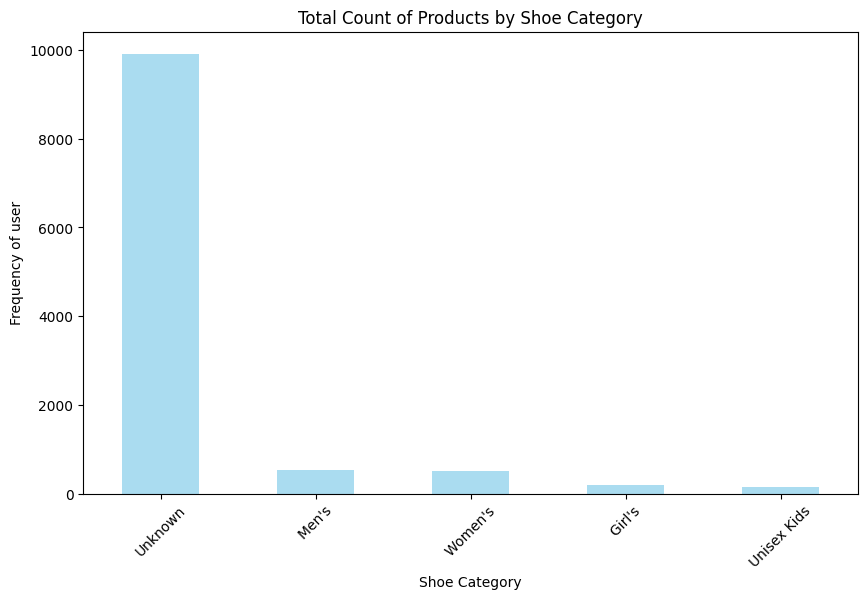

Top 10 recommended items for user 123 :
1. "Happy Boot" PVC ladies/mens riding boot, size 38, black, green synthetik lining, water proof, H 39/ W 42, short length, wide
2. 'World''s Best Girlfriend Personalised Female Golfer Golf Keyring/Handbag Charm in Gift Pouch - BR187'
3. (Present:small towel)Black 8, 7 USB LED Women Sport Sneakers Shoes Couple Casual color Lighted Shoes for Luminous LED USB JUNGLEST® Unisex fashion rechargeable LED LED Men High
4. 1 Pair Sport Shoe Cover Waterproof Bicycle overshoe waterproof cycling overshoe Overshoes Road MTB Bike Road Cycling Shoes Toe Cover Warm Protector
5. 10 Crosby Women's Pell Dress Sandal
6. 2021 Mesh Women's Shoes Summer Students Hollow Canvas Shoes Women's Casual Flat Shoes Dark Blue
7. 2021 New No Upper Design Convertible Slippers, Creative Topless Sandals, Beach Eva Soft Sole Hollow Sandals for Men, Quick to Put on and Take off, Comfortably and Lightly
8. 2021 Women Sneakers Canvas Shoes Solid Leopard Breathable Casual Sneakers Woman

In [23]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy


# Apply data preprocessing
processed_df['clean_title'] = processed_df['title'].apply(clean_text)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize)
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_df['clean_title'])

# Feature Engineering
# Here we can use the TF-IDF matrix obtained in the previous step as our features
features = tfidf_matrix.toarray()

# Add a dummy user_id column
processed_df['user_id'] = 1
# Assign unique identifiers to items
processed_df['item_id'] = processed_df['title'].astype('category').cat.codes
# Load the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(processed_df[['user_id', 'item_id', 'price']], reader)
# Split the dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
# Use Singular Value Decomposition (SVD) algorithm
algo = SVD()
# Train the model
algo.fit(trainset)
# Make predictions on the test set
predictions = algo.test(testset)
# Evaluate the model
accuracy.rmse(predictions)

# Plot 5: Clustered Bar Chart of Shoe Categories and Frequency of user
department_counts = processed_df['department'].value_counts()[:5]
plt.figure(figsize=(10, 6))
department_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Total Count of Products by Shoe Category')
plt.xlabel('Shoe Category')
plt.ylabel('Frequency of user')
plt.xticks(rotation=45)
plt.show()

# Function to get recommendations for a user
def get_recommendations(user_id, model, df, top_n=10):
    # Get all product titles
    all_titles = df['title'].unique()

    # Remove the products that the user has already rated
    rated_titles = df[df['price'].notna()]['title']
    unrated_titles = np.setdiff1d(all_titles, rated_titles)

    # Predict ratings for unrated products
    recommendations = []
    for title in unrated_titles:
        predicted_rating = model.predict(user_id, title).est
        recommendations.append((title, predicted_rating))

    # Sort recommendations by predicted ratings
    recommendations.sort(key=lambda x: x[1], reverse=True)

    # Return top N recommendations
    return [recommendation[0] for recommendation in recommendations[:top_n]]

# Step 4: Recommendation Generation
# Example: Generate top-N recommendations for a user
user_id = 123  # Example user ID
n_recommendations = 10  # Number of recommendations to generate

# Get a list of all item IDs
all_item_ids = processed_df['item_id'].unique()

# Remove items the user has already rated from the list
rated_item_ids = processed_df[processed_df['user_id'] == user_id]['item_id'].values
to_predict_item_ids = np.setdiff1d(all_item_ids, rated_item_ids)

# Predict ratings for the items not rated by the user
user_predictions = [algo.predict(user_id, item_id) for item_id in to_predict_item_ids]

# Sort predictions by estimated rating (descending order)
user_predictions.sort(key=lambda x: x.est, reverse=True)


# Get top-N recommended item IDs
top_n_item_ids_encoded = [prediction.iid for prediction in user_predictions[:n_recommendations]]
# Get top-N recommended item IDs
top_n_item_ids = [processed_df[processed_df['item_id'] == encoded_id]['title'].iloc[0] for encoded_id in top_n_item_ids_encoded]


# Display the top-N recommended item IDs
print("Top", n_recommendations, "recommended items for user", user_id, ":")
for i, item_title in enumerate(top_n_item_ids, 1):
    print(f"{i}. {item_title}")

"Happy Boot" PVC Ladies/Mens Riding Boot: Suitable for individuals looking for waterproof riding boots with a wide fit.
'World's Best Girlfriend' Personalised Female Golfer Golf Keyring/Handbag Charm: A personalized gift option for female golfers.
USB LED Women Sport Sneakers Shoes: LED sport sneakers suitable for both men and women, ideal for those interested in fashionable and functional footwear.
Sport Shoe Cover Waterproof Bicycle Overshoe: Protective gear for cyclists, useful for those who frequently engage in cycling activities.
10 Crosby Women's Pell Dress Sandal: Elegant dress sandal option for women, suitable for formal occasions or everyday wear.
2021 Mesh Women's Shoes: Casual canvas shoes in dark blue, ideal for summer wear or casual outings.
2021 New No Upper Design Convertible Slippers: Innovative and comfortable sandals suitable for beachwear or casual use.
2021 Women Sneakers Canvas Shoes Solid Leopard: Stylish and breathable sneakers for women, featuring a leopard print design.
2021NewPlatform Sandals for Womens Faux Leather Espadrilles: Trendy platform sandals with a faux leather finish, perfect for summer fashion.
24 HORAS Women's 23970 Slip On Trainers: Slip-on trainers for women, offering convenience and comfort for daily activities.

Overall, the recommendations cover a variety of styles and purposes, catering to different preferences and needs.

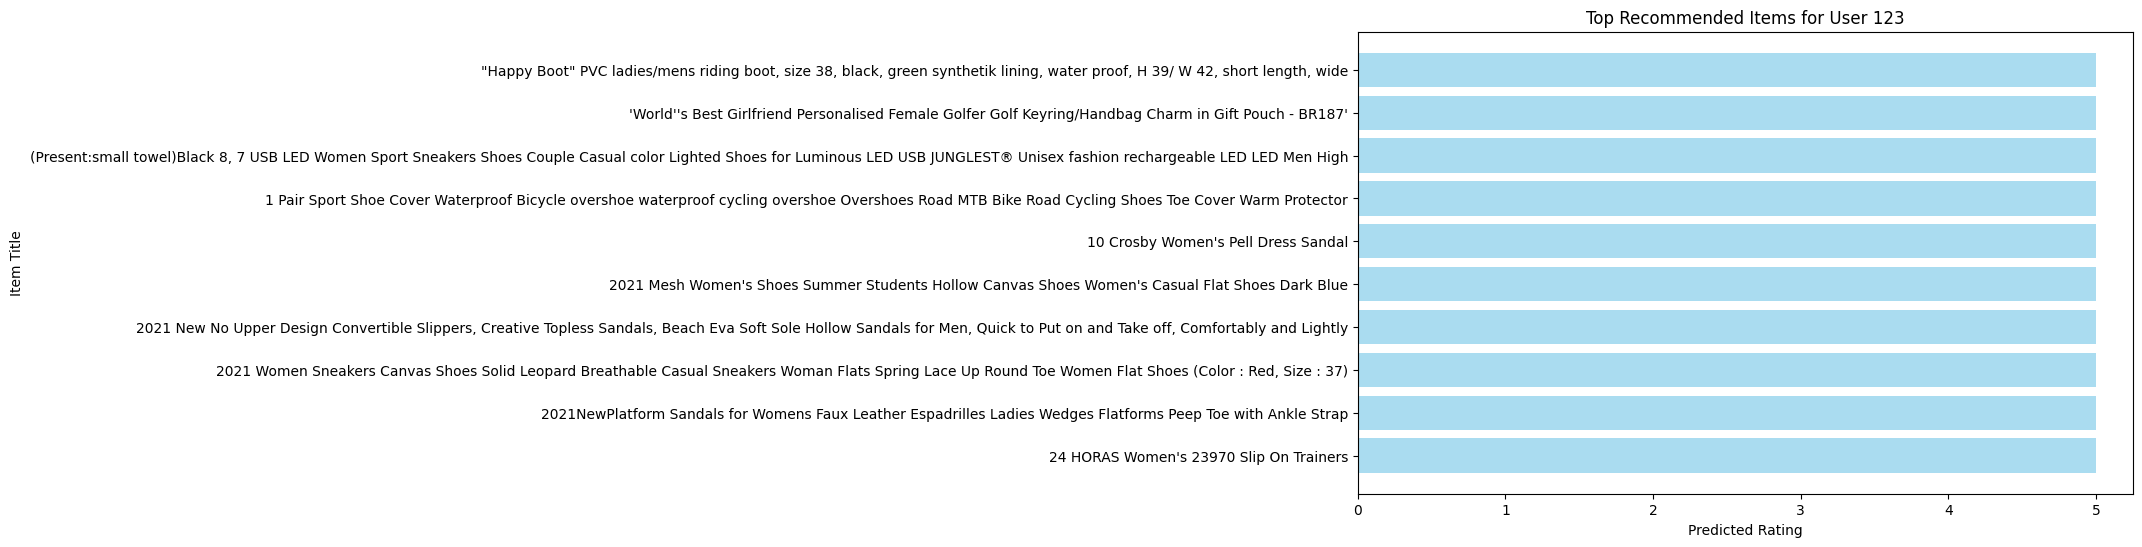

In [24]:
import matplotlib.pyplot as plt

# Extract predicted ratings and item titles for visualization
predicted_ratings = [prediction.est for prediction in user_predictions[:n_recommendations]]
item_titles = [processed_df[processed_df['item_id'] == encoded_id]['title'].iloc[0] for encoded_id in top_n_item_ids_encoded]

# Plot the top recommended items
plt.figure(figsize=(10, 6))
plt.barh(item_titles, predicted_ratings, color='skyblue', alpha=0.7)
plt.xlabel('Predicted Rating')
plt.ylabel('Item Title')
plt.title('Top Recommended Items for User {}'.format(user_id))
plt.gca().invert_yaxis()  # Invert y-axis to display highest rating on top
plt.show()


In [25]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pillow<11,>=7.1.0 in c:\users\harsh\anaconda3\lib\site-packages (from streamlit) (9.0.1)

